# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
data.groupby('children')['debt'].value_counts(normalize=True) * 100

children  debt
0         0        92.456178
          1         7.543822
1         0        90.765391
          1         9.234609
2         0        90.545809
          1         9.454191
3         0        91.818182
          1         8.181818
4         0        90.243902
          1         9.756098
5         0       100.000000
Name: debt, dtype: float64

<AxesSubplot:xlabel='children', ylabel='debt'>

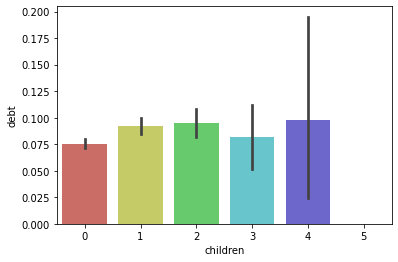

In [23]:
sns.barplot(x='children', y='debt', palette='hls', data=data)

In [24]:
data['children'].value_counts() 

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

**Вывод:** Чаще всего кредит возращают в срок заемщики, которые не имеют детей. Заемщки, которые имеют одного, двух или четырех детей возращают кредит в срок вовремя в 90%. Семьи с тремя и пятью деьми возращают кредит в 91% и 100% соответсвенно. Высокий процент у заемщиков с большим количеством детей связан с тем, что таких заемщиков очень мало по сравнению с теми, кто детей не имеют.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
data.groupby('family_status')['debt'].value_counts(normalize=True) * 100

family_status          debt
Не женат / не замужем  0       90.236052
                       1        9.763948
в разводе              0       92.935240
                       1        7.064760
вдовец / вдова         0       93.375394
                       1        6.624606
гражданский брак       0       90.686986
                       1        9.313014
женат / замужем        0       92.439442
                       1        7.560558
Name: debt, dtype: float64

<AxesSubplot:xlabel='family_status', ylabel='debt'>

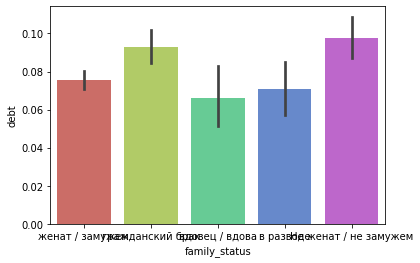

In [26]:
sns.barplot(x='family_status', y='debt', palette='hls', data=data)

In [27]:
data['family_status'].value_counts()

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

**Вывод:** Процент заемщиков, офицально зарегистрировших совй брак, достаточно высок - 92%, выше только у вдов и вдовцов, это объясняется небольшим количеством таких заемщиков - всего 951 человек, это почти в 13 раз меншье тех, кто находится в статусе "женат / замужем".

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
data.groupby('total_income_category')['debt'].value_counts(normalize=True) * 100

total_income_category  debt
A                      0       92.000000
                       1        8.000000
B                      0       92.939769
                       1        7.060231
C                      0       91.501790
                       1        8.498210
D                      0       93.982808
                       1        6.017192
E                      0       90.909091
                       1        9.090909
Name: debt, dtype: float64

<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

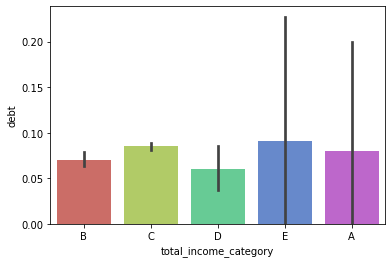

In [29]:
sns.barplot(x='total_income_category', y='debt', palette='hls', data=data)

In [30]:
data['total_income_category'].value_counts() 

C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

**Вывод:** уровень дохода заемщиков делится на следующие категории: 
0–30.000 — 'E';
30.001–50.000 — 'D';
50.001–200.000 — 'C';
200.001–1.000.000 — 'B';
1.000.001 и выше — 'A'. Зависимости между уровнем дохода и возратом кредита в срок - нет. Кредит возращают в срок более 90% заемщиков. Однако, в банке больше всего заемщиков в категрии "С", которые почти в равной степени (по сравнению с категориями "А", "В") возращают кредит вовремя, но численность таких заемщиков в раз больше, чем в других категорях.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
data.groupby('purpose_category')['debt'].value_counts(normalize=True) * 100

purpose_category          debt
операции с автомобилем    0       90.652022
                          1        9.347978
операции с недвижимостью  0       92.744861
                          1        7.255139
получение образования     0       90.747242
                          1        9.252758
проведение свадьбы        0       92.088197
                          1        7.911803
Name: debt, dtype: float64

<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

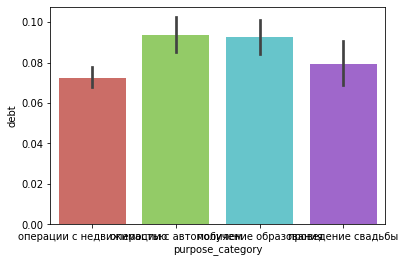

In [32]:
sns.barplot(x='purpose_category', y='debt', palette='hls', data=data)

In [33]:
data['purpose_category'].value_counts() 

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

**Вывод:** самый высокий показатель у категорий "операции с недвижимостью" и "проведение свадьбы" - 92%, однако, заемщиков, которые взяли крдеит для операций с недвижимость почти в 32 раза больше.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* пропуски могут возникать по нескольким причинам: произошла техническая проблема при выгрузке данных, что привело к их потере или человеческий фактор - данные просто забыли занести.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* количественные переменные часто находятся в большом диапозоне значений из-за наличия "вбросов" - аномальных значений, которые искажают результат. Например, есть 11 коробок: каждая из 10 корбок весит 1 кг, а последняя ("вброс"/аномальное значение) - 100 кг. Медианное значение будет равно 1 кг. Среднее арифметическое - 10 кг, однако ни одна из коробок даже близко не весит 10 кг, поэтому лучшимя решением заполнять пропуски для количественных переменых - это медианное значение, оно показывает наиболее достовернную информацию, учитвыая все анломальные (очень маленькие или очень большие) значений.

**Общий вывод:** портрет ***надежного*** клиента выглядет так - не имеет детей, женат или замужем, доход от 50.000 рублей и больше, цель взятия кредита - операции с недвижимостью. Портрет ***ненадежного*** клиента - имеет двух и более детей, не состоит в браке, доход менее 50.000 рублей.

### Шаг 4: общий вывод.

In [34]:
data['purpose_category'].value_counts()

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

Чаще всего кредит берут для операций с недвижимость: покупка квартир, строительство домов и д.р. и почти в 5 раз реже для организации свадьб.

In [35]:
def age_category(age):
    if 18 <= age <= 35:
        return 'молодые'
    if 36 <= age <= 50:
        return 'взрослые'
    if 51 <= age:
        return 'пожилые'
data['dob_years_category'] = data['dob_years'].apply(age_category)

In [36]:
data['dob_years_category'].value_counts()

взрослые    8073
пожилые     6614
молодые     6544
Name: dob_years_category, dtype: int64

Чаще всего кредит берут взрослые люди (36 - 50 лет). Маркетологом стоит делать акцент на аудиторию этого возраста.

In [37]:
data['gender'].value_counts()

F      14092
M       7238
XNA        1
Name: gender, dtype: int64

При ответе на вопрос "кто является клиентом банка в большей степени - мужчины или женщины" обнаружилось, что есть еще одно значение - "XNA", отнесем его к мужчинам(М).

In [38]:
data[data['gender'] == 'XNA'] = 'M' # заменяем
print(data['gender'].value_counts()) # делаем проверку

F    14092
M     7239
Name: gender, dtype: int64


**Вывод:** женщины являются клиентами банка в два раза больше мужчин.